In [1]:
import sys; sys.path.insert(0, "..") 
import os
import random
import torch
import src.visualization.utils as vis
from src.dataset.dataset import CustomDataset 
from src.dataset.utils import get_active_learning_datasets
from src.models.resnet import resnet10
import numpy as np

# model = resnet10(num_seg_classes=3)
# checkpoint = torch.load("resnet_10.pth")
# print(model)
def seed_all(seed):
    np.random.seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)

seed_all(123)

In [24]:
import src.visualization.utils as vis
from torchvision import transforms
from src.dataset.dataset import CustomDataset, CustomFileDataset, collate_fn_padd
from src.dataset.utils import get_active_learning_datasets, MyRotationTransform


dataset = CustomDataset(data_path="../data/NPY/volumes/",
                             target_path="../data/NPY/labels/")
train_indices, val_indices, test_indices, _= get_active_learning_datasets(dataset, split=[0.1, 0.7, 0.2])
train_transform = transforms.Compose([#transforms.Resize(255),
                                        transforms.RandomVerticalFlip(),
                                        transforms.RandomHorizontalFlip(),
                                        transforms.Normalize((0.5, ), (0.5, )),
                                        transforms.RandomAffine(degrees=(30, 70), translate=(0.1, 0.1)),
                                        #transforms.ColorJitter(brightness=.5, hue=.3),
                                      ])

train_datset = CustomFileDataset([dataset.data_paths[idx] for idx in list(train_indices)],
                                        [dataset.targets[idx] for idx in list(train_indices)],
                                            train_transform)


train_dataloader = torch.utils.data.DataLoader(dataset=train_datset,
                            num_workers=4,
                            batch_size=5,
                            pin_memory=True,
                            shuffle=False,
                            collate_fn=collate_fn_padd)

CP sample len 1496
NCP sample len 1218
Normal sample len 472
size train files: 141
size test files: 282
size val files: 990
size initial pool files: 3


torch.Size([1, 64, 512, 512])


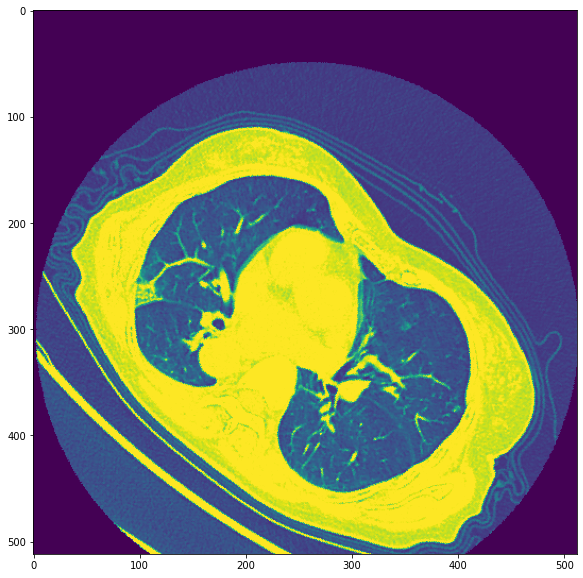

In [27]:
import matplotlib.pyplot as plt
print(train_datset[0][0].shape)
plt.imshow(train_datset[0][0].squeeze()[32])

Feature batch shape: torch.Size([5, 1, 64, 512, 512])
Labels batch shape: torch.Size([5])
Label: 2


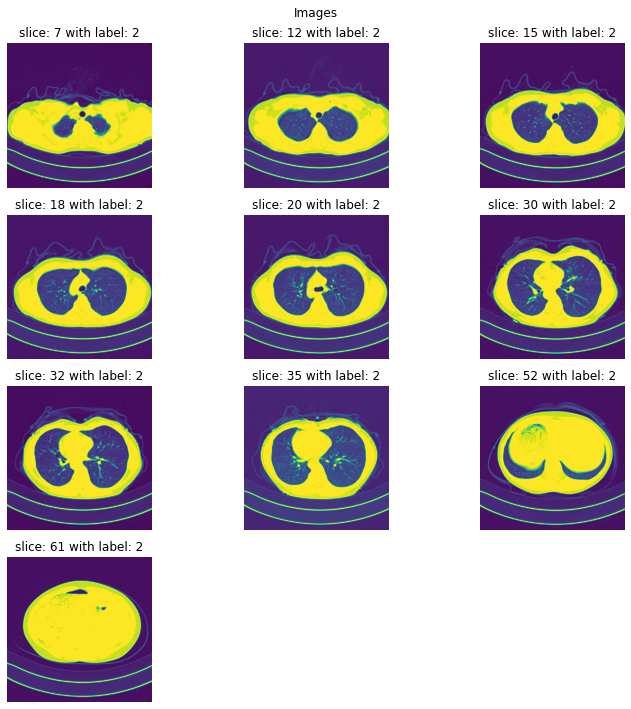

Feature batch shape: torch.Size([5, 1, 64, 512, 512])
Labels batch shape: torch.Size([5])
Label: 2


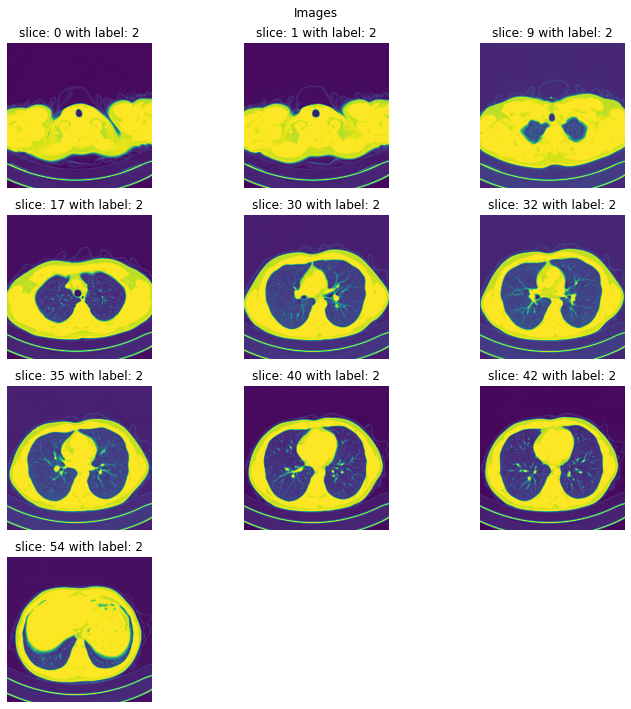

In [7]:
for i, batch in enumerate(train_dataloader):
    train_features, train_labels = batch
    print(f"Feature batch shape: {train_features.size()}")
    print(f"Labels batch shape: {train_labels.size()}")
    img = train_features[0].squeeze(0)
    label = train_labels[0]

    print(f"Label: {label}")
    vis.plot_from_volume_tensor(img, label, n_samples=10)
    if i>=1:
        break